In [ ]:
import scipy.io
import pandas as pd
import numpy as np
from google.colab import drive
import cv2
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt

drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
dir = '/content/drive/MyDrive/Tugas Akhir/Donny/'
items = os.listdir(dir)
items.sort()

In [ ]:
from random import sample
test = sample(items,1)
test

['481.png']

481.png


(-0.5, 495.5, 123.5, -0.5)

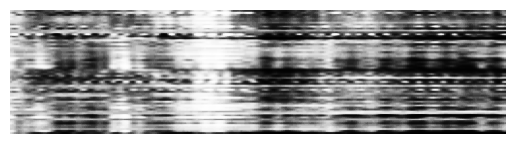

In [ ]:
from google.colab.patches import cv2_imshow
from PIL import Image

img = cv2.imread('/content/drive/MyDrive/Tugas Akhir/Datasethisto/'+test[0])
print(test[0])


plt.imshow(img)
plt.axis('off')


In [ ]:
import numpy as np

def ciriGLDM(x):
    # menghitung ciri dari GLDM
    # h(g|tetha) = probabilitas dif
    # Gradien kontras = sigma (g(h(q|theta)))

    z = np.histogram(np.uint8(x), bins=256, range=(0, 256))[0]
    hg = z / np.sum(z) # Normalized histogram

    # Initialize feature vectors
    gradkon = np.zeros(256) # Gradient contrast
    gradmean = np.zeros(256) # Gradient mean
    idm = np.zeros(256) # Inverse different moment

    # Calculate features for each gray level
    for i in range(256):
        gradkon[i] = (((i-1)**2) * hg[i]) # Gradient contrast for each gray level
        gradmean[i] = (i-1) * hg[i] # Gradient mean for each gray level
        idm[i] = hg[i] / ((i-1)**2 + 1) # Inverse different moment for each gray level

    gradkont = np.sum(gradkon) # Sum of gradient contrasts (ASM)
    gradsm = np.sum(hg**2) # Sum of squared probabilities (second moment)
    gradent = np.sum(hg * np.log10(hg + np.finfo(float).eps)) # Entropy
    gradmeant = np.sum(gradmean) # Sum of gradient means
    idmt = np.sum(idm) # Sum of inverse different moments

    return gradkont, gradsm, gradent, gradmeant, idmt

In [ ]:
from tqdm.notebook import tqdm_notebook
new_path = "/content/drive/MyDrive/Tugas Akhir/Datasethisto/"
items = os.listdir(new_path)
items.sort()
distance = 5
for dis in tqdm_notebook(range(distance),"distance"):
  # Initialize variables
  FiturEEG = np.zeros((1250, 25))
  N = 0
  d = dis+1
  print(d)

  for k in tqdm_notebook(items,"Image"):
      image = cv2.imread(new_path+k)

      s = np.shape(image)
      inImg = image.astype(float)

      # matrices
      pro1 = np.zeros(s)  # diff arah 0 derajat
      pro2 = np.zeros(s)  # diff arah 45 derajat
      pro3 = np.zeros(s)  # diff arah 90 derajat
      pro4 = np.zeros(s)  # diff arah 135 derajat

      for i in range(s[0]-d): # dikurangin d agar index tidak melebihi dimensi
          for j in range(s[1]-d): # dikurangin d agar index tidak melebihi dimensi

              if (j + d) <= s[1]:
                  pro1[i, j] = abs(inImg[i, j] - inImg[i, j + d])
              if (i - d) > 0 and (j + d) <= s[1]:
                  pro2[i, j] = abs(inImg[i, j] - inImg[i - d, j + d])
              if (i + d) <= s[0]:
                  pro3[i, j] = abs(inImg[i, j] - inImg[i + d, j])
              if (i - d) > 0 and (j - d) > 0:
                  pro4[i, j] = abs(inImg[i, j] - inImg[i - d, j - d])

      # ekstraksi ciri
      gradkont0, gradsm0, gradent0, gradmeant0, idmt0 = ciriGLDM(pro1)
      ciri0 = [gradkont0, gradsm0, gradent0, gradmeant0, idmt0]

      gradkont45, gradsm45, gradent45, gradmeant45, idmt45 = ciriGLDM(pro2)
      ciri45 = [gradkont45, gradsm45, gradent45, gradmeant45, idmt45]

      gradkont90, gradsm90, gradent90, gradmeant90, idmt90 = ciriGLDM(pro3)
      ciri90 = [gradkont90, gradsm90, gradent90, gradmeant90, idmt90]

      gradkont135, gradsm135, gradent135, gradmeant135, idmt135 = ciriGLDM(pro4)
      ciri135 = [gradkont135, gradsm135, gradent135, gradmeant135, idmt135]

      kontrata = (gradkont0 + gradkont45 + gradkont90 + gradkont135) / 4
      asmrata = (gradsm0 + gradsm45 + gradsm90 + gradsm135) / 4
      entrata = (gradent0 + gradent45 + gradent90 + gradent135) / 4
      meanrata = (gradmeant0 + gradmeant45 + gradmeant90 + gradmeant135) / 4
      idmrata = (idmt0 + idmt45 + idmt90 + idmt135) / 4
      cirirata = [kontrata, asmrata, entrata, meanrata, idmrata]

      ciritotal = np.concatenate((ciri0, ciri45, ciri90, ciri135, cirirata))

      FiturEEG[N, :] = ciritotal

      N = N + 1
  columns_feature = 'gradkont0, gradsm0, gradent0, gradmeant0, idmt0,gradkont45, gradsm45, gradent45, gradmeant45, idmt45,gradkont90, gradsm90, gradent90, gradmeant90, idmt90,gradkont135, gradsm135, gradent135, gradmeant135, idmt135,kontrata, asmrata, entrata, meanrata, idmrata'
  columns_feature = columns_feature.split(',')
  columns_feature = [col+"_distance_"+str(d) for col in columns_feature]
  # columns_feature = columns_feature.split(" ")
  features = pd.DataFrame(FiturEEG,columns=columns_feature)
  features.to_csv("/content/drive/MyDrive/Tugas Akhir/GLDM_Histo/"+str(d)+".csv")


distance:   0%|          | 0/5 [00:00<?, ?it/s]

1


Image:   0%|          | 0/1250 [00:00<?, ?it/s]

2


Image:   0%|          | 0/1250 [00:00<?, ?it/s]

3


Image:   0%|          | 0/1250 [00:00<?, ?it/s]

4


Image:   0%|          | 0/1250 [00:00<?, ?it/s]

5


Image:   0%|          | 0/1250 [00:00<?, ?it/s]

In [ ]:
features = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/GLDM_Histo/1.csv')
features

,Unnamed: 0,gradkont0_distance_1,gradsm0_distance_1,gradent0_distance_1,gradmeant0_distance_1,idmt0_distance_1,gradkont45_distance_1,gradsm45_distance_1,gradent45_distance_1,gradmeant45_distance_1,...,gradkont135_distance_1,gradsm135_distance_1,gradent135_distance_1,gradmeant135_distance_1,idmt135_distance_1,kontrata_distance_1,asmrata_distance_1,entrata_distance_1,meanrata_distance_1,idmrata_distance_1
0,0,852.735513,0.117840,-1.387989,15.397096,0.204725,2757.265869,0.038759,-1.787223,34.540550,...,2784.301509,0.039960,-1.785210,34.640739,0.106685,2163.347827,0.060649,-1.672430,28.740980,0.134075
1,1,725.579946,0.499051,-0.610249,10.765365,0.373225,2644.616496,0.196879,-1.114148,29.940280,...,2636.691272,0.199007,-1.111068,29.821995,0.236305,2088.071942,0.277246,-0.978864,24.463673,0.272981
2,2,647.999577,0.286719,-0.988852,11.945532,0.285363,2616.781510,0.084636,-1.518450,32.160607,...,2655.982180,0.085630,-1.518671,32.507772,0.151338,2055.142852,0.137999,-1.376138,26.553866,0.187427
3,3,168.971351,0.246996,-1.020031,6.119927,0.295015,2583.345782,0.033127,-1.838093,34.869976,...,2576.596921,0.033385,-1.835664,34.787250,0.095831,1989.084324,0.086322,-1.634400,27.670294,0.144853
4,4,43.442459,0.172682,-1.036571,3.431240,0.281552,2005.638349,0.020152,-1.906571,30.882430,...,2001.510617,0.020510,-1.904238,30.774665,0.071528,1506.358253,0.058135,-1.688834,23.911209,0.123271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1245,759.942069,0.085823,-1.480473,14.313297,0.184753,2575.211173,0.026512,-1.886087,33.493269,...,2596.505089,0.027315,-1.882759,33.525478,0.085425,2012.320028,0.042672,-1.769924,27.708864,0.112755
1246,1246,645.993952,0.103182,-1.420983,13.228115,0.201151,2676.521673,0.027705,-1.882431,34.197337,...,2690.848172,0.028922,-1.879455,34.224961,0.093323,2077.216462,0.047653,-1.755875,28.165863,0.120684
1247,1247,761.076678,0.284538,-0.972696,13.642300,0.282329,2943.297395,0.087993,-1.478477,35.123748,...,2949.588515,0.091052,-1.472279,34.970181,0.153043,2298.342148,0.141071,-1.338234,28.868277,0.187067
1248,1248,824.926834,0.426658,-0.721081,12.130951,0.340229,2973.501577,0.151560,-1.229311,33.286534,...,2964.395454,0.152395,-1.224989,33.229286,0.200745,2340.262324,0.225327,-1.089315,27.208190,0.239096


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

csv_list = ['/content/drive/MyDrive/Tugas Akhir/GLDM_Histo/1.csv','/content/drive/MyDrive/Tugas Akhir/GLDM_Histo/2.csv','/content/drive/MyDrive/Tugas Akhir/GLDM_Histo/3.csv','/content/drive/MyDrive/Tugas Akhir/GLDM_Histo/4.csv',
            '/content/drive/MyDrive/Tugas Akhir/GLDM_Histo/5.csv']
row_list =[]
acc_list = []
for key,i in enumerate(csv_list):
  print(i)
  feature_row = ["GLDM_0","GLDM_45","GLDM_90","GLDM_135","GLDM_rata"]
  now = 0
  features = pd.read_csv(i)
  features.drop(columns=features.columns[0], axis=1,  inplace=True)
  while now <=20:

    print(feature_row[now//5]+"_distance"+str(key+1))
    new_feat = features.iloc[:,now:now+5]


    scaler = MinMaxScaler()
    df = scaler.fit_transform(new_feat)
    label = pd.DataFrame(np.zeros((1250, 1)), columns=['label'])
    label.label[:601] = 1
    label.label[601:] = 0
    df1 = np.expand_dims(df, axis=-1)

    X_train, X_test, y_train, y_test=train_test_split(df1, label, test_size=0.2, random_state=100)


    checkpoint_filepath = 'model_checkpoint.h5'

    # Define the checkpoint callback
    checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        save_best_only=True,
        monitor='val_accuracy',
        mode='max',
        verbose=1
    )
    early_stop = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min')

    model = Sequential([
        Conv2D(16, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1), padding='same'),
        MaxPooling2D(pool_size=(2, 2), padding='same'),
        Dropout(0.2),
        Conv2D(32, kernel_size=3, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), padding='same'),
        Dropout(0.2),
        Conv2D(64, kernel_size=3, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), padding='same'),
        Dropout(0.2),
        Conv2D(128, kernel_size=3, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), padding='same'),
        Dropout(0.2),
        Conv2D(128, kernel_size=3, activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), padding='same'),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adamax(), metrics=['accuracy'])
    model.fit(X_train,y_train, epochs=150, batch_size=32, validation_split=0.2,callbacks = [checkpoint_callback,early_stop],verbose=0)
    from sklearn.metrics import accuracy_score
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred,0)
    accuracy = accuracy_score(y_test, y_pred)
    row_list.append(feature_row[now//5]+"_distance"+str(key+1))
    print()
    acc_list.append(accuracy)

    now += 5
# print("Accuracy:", accuracy)



/content/drive/MyDrive/Tugas Akhir/GLDM_Histo/1.csv
GLDM_0_distance1

Epoch 1: val_accuracy improved from -inf to 0.54000, saving model to model_checkpoint.h5

Epoch 2: val_accuracy did not improve from 0.54000

Epoch 3: val_accuracy did not improve from 0.54000

Epoch 4: val_accuracy did not improve from 0.54000

Epoch 5: val_accuracy did not improve from 0.54000

Epoch 6: val_accuracy did not improve from 0.54000

Epoch 7: val_accuracy did not improve from 0.54000

Epoch 8: val_accuracy did not improve from 0.54000

Epoch 9: val_accuracy did not improve from 0.54000

Epoch 10: val_accuracy improved from 0.54000 to 0.56500, saving model to model_checkpoint.h5

Epoch 11: val_accuracy improved from 0.56500 to 0.59000, saving model to model_checkpoint.h5

Epoch 12: val_accuracy improved from 0.59000 to 0.59500, saving model to model_checkpoint.h5

Epoch 13: val_accuracy improved from 0.59500 to 0.61000, saving model to model_checkpoint.h5

Epoch 14: val_accuracy did not improve from 0.61

In [ ]:
list_of_accuracy = pd.DataFrame({'angle':row_list,'accuracy':acc_list})
list_of_accuracy

,angle,accuracy
0,GLDM_0_distance1,0.564
1,GLDM_45_distance1,0.576
2,GLDM_90_distance1,0.544
3,GLDM_135_distance1,0.564
4,GLDM_rata_distance1,0.560
5,GLDM_0_distance2,0.564
6,GLDM_45_distance2,0.564
7,GLDM_90_distance2,0.548
8,GLDM_135_distance2,0.560
9,GLDM_rata_distance2,0.580
